In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('ronda1.csv', sep=';', decimal=',')
df2 = pd.read_csv('ronda2.csv', sep=';', decimal=',')
df3 = pd.read_csv('ronda3.csv', sep=';', decimal=',')

df = pd.concat([df1, df2, df3], ignore_index=True)
print(df.columns)

Index(['Angulo real', 'Encoder', 'Real ajustado'], dtype='object')


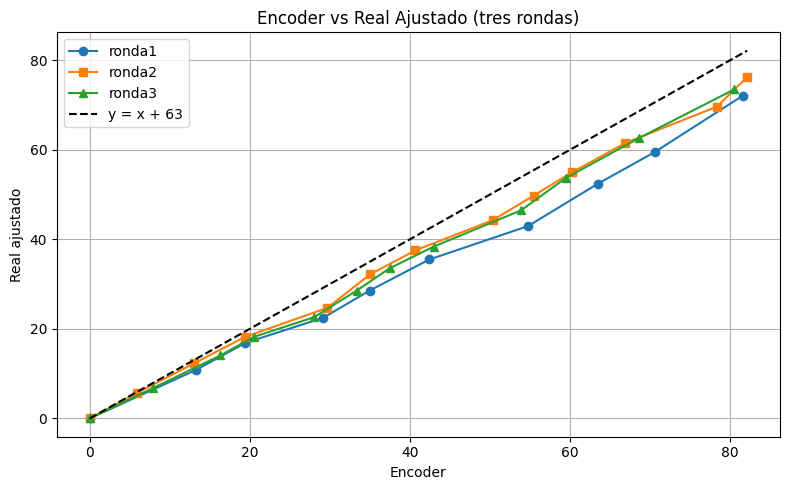

In [14]:
plt.figure(figsize=(8,5))

for df_i, label, marker in [(df1, 'ronda1', 'o'),
                            (df2, 'ronda2', 's'),
                            (df3, 'ronda3', '^')]:
    d = df_i.sort_values('Encoder')
    plt.plot(d['Encoder'], d['Real ajustado'],
             marker=marker, linestyle='-', label=label)

# --- Add line y = x + 63 ---
# Build x range from all data
xmin = min(df1['Encoder'].min(), df2['Encoder'].min(), df3['Encoder'].min())
xmax = max(df1['Encoder'].max(), df2['Encoder'].max(), df3['Encoder'].max())
x_line = np.linspace(xmin, xmax, 300)
y_line = x_line

plt.plot(x_line, y_line, 'k--', label='y = x + 63')
# --------------------------------

plt.xlabel('Encoder')
plt.ylabel('Real ajustado')
plt.title('Encoder vs Real Ajustado (tres rondas)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


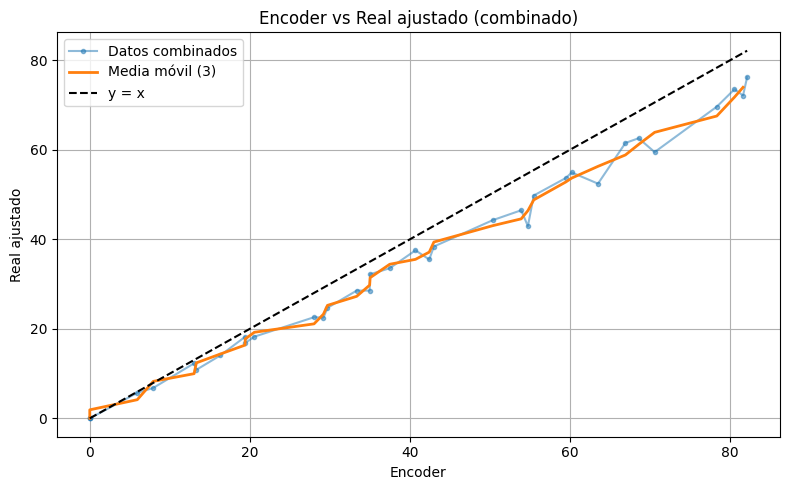

In [17]:
df.sort_values('Encoder', inplace=True)

# Compute moving average (choose your window size)
window = 3
df['MA'] = df['Real ajustado'].rolling(window=window, center=True).mean()

plt.figure(figsize=(8,5))

# Raw data
plt.plot(df['Encoder'], df['Real ajustado'],
         marker='.', linestyle='-', alpha=0.5, label='Datos combinados')

# Moving average
plt.plot(df['Encoder'], df['MA'],
         linestyle='-', linewidth=2, label=f'Media móvil ({window})')

# y = x + 63 line
xmin = df['Encoder'].min()
xmax = df['Encoder'].max()
x_line = np.linspace(xmin, xmax, 300)
y_line = x_line
plt.plot(x_line, y_line, 'k--', label='y = x')

plt.xlabel('Encoder')
plt.ylabel('Real ajustado')
plt.title('Encoder vs Real ajustado (combinado)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
